In [1]:
"""                                                                                                 
Separate file to keep segmentation paramters in it. E.g,                                            
stopping_criterion = 0.47                                                                           
vessel_probability_threshold = .68                                                                  
dilation_size = 3                                                                                   
minimum_size = 4000
"""
from segmentation_param import *
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp

In [2]:
#segmentation entry point functions
from read_tiff_files import read_tiff_files
from classify_pixel import classify_pixel
import detect_cells
from segment_vessels import segment_vessels
import create_synth_dict

No handlers could be found for logger "ilastik.applets.tracking.conservation.opConservationTracking"


In [3]:
# Following parameters to be passed in as parameters to this script. 
tiff_files_location = '/home/aaron/data/xray/cb2/cb2_images'
classifier_file = '/home/aaron/data/xray/cb2/lee_harvard_cb_sample.ilp'

In [54]:
# Read tiff stack files - output of tomopy. 
input_data = read_tiff_files(tiff_files_location)

In [55]:
print("input_data shape", input_data.shape)

('input_data shape', (1770, 1998, 151))


In [56]:
%matplotlib inline

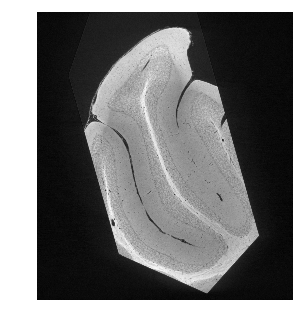

In [57]:
ndp.plot(input_data, slice=50)

In [58]:
# Compute cell and vessel probability map.
probability_maps = classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size) 

INFO ilastik_main: Starting ilastik from "/home/aaron/anaconda2/envs/ilastik-dev".
INFO ilastik_main: Starting ilastik from "/home/aaron/anaconda2/envs/ilastik-dev".
Starting ilastik from "/home/aaron/anaconda2/envs/ilastik-dev".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO ilastik.shell.projectManager: Opening Project: /home/aaron/data/xray/cb2/lee_harvard_cb_sample.ilp
INFO ilastik.shell.projectManager: Opening Project: /home/aaron/data/xray/cb2/lee_harvard_cb_sample.ilp
input_data.shape (1770, 1998, 151)
label_names, label_colors, probability_colors ['Vessels', 'Cells', 'Bg'] [(255, 0, 0), (0, 255, 0), (255, 255, 0)] [(255, 0, 0), (0, 255, 0), (255, 255, 

In [59]:
cell_prob_map = probability_maps[:, :, :, 2]

In [60]:
print("cell_prob_map shape", cell_prob_map.shape)

('cell_prob_map shape', (1770, 1998, 151))


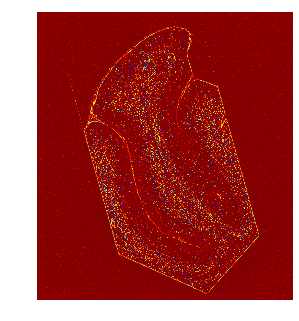

In [61]:
ndp.plot(cell_prob_map, slice=50, cmap1='jet')

In [62]:
vessel_prob_map = probability_maps[:, :, :, 1]

In [63]:
print("vessel_prob_map shape", vessel_prob_map.shape)

('vessel_prob_map shape', (1770, 1998, 151))


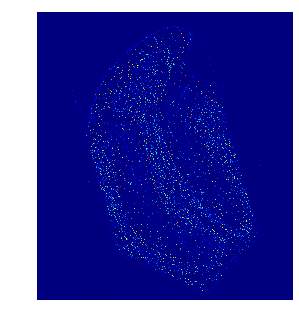

In [64]:
ndp.plot(vessel_prob_map, slice=50, cmap1='jet')

In [88]:
# Parallel operation to detect cells to be designed. Hard coded for now - cut 400x400x40 volume.
crop_probability_maps = probability_maps[800:1100, 400:700,:]

In [89]:
print("crop_probability_maps shape", crop_probability_maps.shape)

('crop_probability_maps shape', (300, 300, 151, 3))


In [90]:
crop_cell_prob__map = crop_probability_maps[:, :, :, 1]

In [91]:
print("crop_cell_prob__map shape", crop_cell_prob__map.shape)

('crop_cell_prob__map shape', (300, 300, 151))


In [92]:
crop_vessel_prob_map = crop_probability_maps[:, :, :, 0]

In [93]:
print("crop_vessel_prob_map", crop_vessel_prob_map.shape)

('crop_vessel_prob_map', (300, 300, 151))


In [94]:
crop_input_data = input_data[800:1100, 400:700,:]

In [95]:
print("crop_input_data shape", crop_input_data.shape)

('crop_input_data shape', (300, 300, 151))


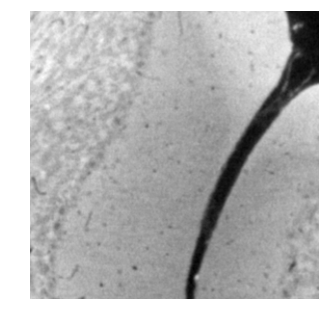

In [96]:
ndp.plot(crop_input_data, slice=50, cmap1='gray')

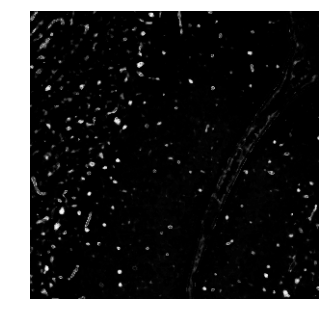

In [97]:
ndp.plot(crop_cell_prob__map, slice=50, cmap1='gray')

In [81]:
initial_template_size=6

In [82]:
stopping_criterion=0.7

In [83]:
print(initial_template_size)

6


In [98]:
centroids, cell_map = detect_cells.detect_cells(crop_cell_prob__map, cell_probability_threshold, stopping_criterion, initial_template_size, dilation_size, max_no_cells) 

Iteration remaining =  499 Correlation =  [[ 0.85874999]]
Iteration remaining =  449 Correlation =  [[ 0.82571435]]
Iteration remaining =  399 Correlation =  [[ 0.80303574]]
Iteration remaining =  349 Correlation =  [[ 0.77357143]]
Iteration remaining =  299 Correlation =  [[ 0.71571428]]
Cell Detection is done


In [103]:
print(centroids.shape)

(215, 4)


In [100]:
print(cell_map.shape)

(300, 300, 151)


In [104]:
vessel_map = segment_vessels(crop_vessel_prob_map, vessel_probability_threshold, dilation_size, minimum_size) 

In [105]:
print(vessel_map.shape)

(300, 300, 151)


Raw Image Slice


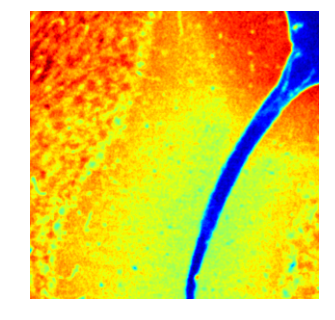

In [101]:
print("Raw Image Slice")
ndp.plot(crop_input_data, slice=50,cmap1='jet')

Cell Segmentation


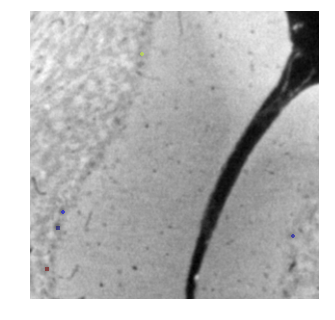

In [102]:
print("Cell Segmentation")
ndp.plot(crop_input_data, cell_map, slice = 50, alpha = 0.5)

In [ ]:
print("Vessel Segmentation")
ndp.plot(crop_input_data, vessel_map, slice = 50, alpha = 0.5)

Cell Probabilities


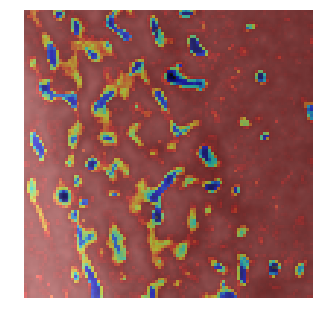

In [49]:
print("Cell Probabilities")
ndp.plot(crop_input_data, crop_cell_prob__map, slice = 50, alpha = 0.5)

Vessel Probabilities


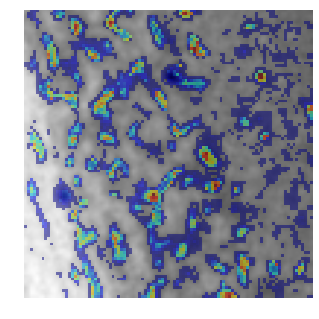

In [50]:
print("Vessel Probabilities")
ndp.plot(crop_input_data, crop_vessel_prob_map, slice = 50, alpha = 0.5)

In [51]:
print(box_radius)

NameError: name 'box_radius' is not defined